In [37]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [38]:
import re # for regular expressions
import pandas as pd 
pd.set_option("display.max_colwidth", 200)
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import string
import nltk # for text manipulation
import warnings 
warnings.filterwarnings("ignore", category=DeprecationWarning)

%matplotlib inline

In [39]:
df = pd.read_csv(r"C:\Users\chari\Downloads\vaccination2.csv.zip")
df.tail(5)


,id,conversation_id,created_at,date,time,timezone,user_id,username,name,place,...,quote_url,video,near,geo,source,user_rt_id,user_rt,retweet_id,reply_to,retweet_date
89968,1141576873031454721,1141576873031454721,1561008110000,2019-06-20,08:21:50,E. Africa Standard Time,547353397,reallmystics,(@v@),NaN,...,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,"[{'user_id': '547353397', 'username': 'ReallMystics'}]",NaN
89969,1141575819761876994,1141296731721588737,1561007859000,2019-06-20,08:17:39,E. Africa Standard Time,931439360,draruntiwari,Dr Arun Tiwari,NaN,...,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,"[{'user_id': '931439360', 'username': 'DrArunTiwari'}, {'user_id': '3188352482', 'username': '6HDecS1itWWqe2y'}, {'user_id': '1101168841844056065', 'username': 'theauditor56'}, {'user_id': '997165...",NaN
89970,1141575716842037250,1141300310255788032,1561007835000,2019-06-20,08:17:15,E. Africa Standard Time,909602112849330177,kbb1947,Kamal,NaN,...,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,"[{'user_id': '909602112849330177', 'username': 'kbb1947'}, {'user_id': '211643692', 'username': 'AmyJBrittain'}, {'user_id': '119048275', 'username': 'szarabi'}]",NaN
89971,1141575409424723968,1141575409424723968,1561007761000,2019-06-20,08:16:01,E. Africa Standard Time,1095146858849038341,morriganresists,MorriganResists,NaN,...,https://twitter.com/Boba_Tea_Catan/status/1141572904934449152,0,NaN,NaN,NaN,NaN,NaN,NaN,"[{'user_id': '1095146858849038341', 'username': 'MorriganResists'}, {'user_id': '999352028064198661', 'username': 'Boba_Tea_Catan'}]",NaN
89972,1141575046286045184,1141575046286045184,1561007675000,2019-06-20,08:14:35,E. Africa Standard Time,361935088,vendornaija,VendorNaija,NaN,...,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,"[{'user_id': '361935088', 'username': 'VendorNaija'}]",NaN


In [40]:
print('Dataset size:',df.shape)
print('Columns are:',df.columns)

Dataset size: (89973, 31)
Columns are: Index(['id', 'conversation_id', 'created_at', 'date', 'time', 'timezone',
       'user_id', 'username', 'name', 'place', 'tweet', 'mentions', 'urls',
       'photos', 'replies_count', 'retweets_count', 'likes_count', 'hashtags',
       'cashtags', 'link', 'retweet', 'quote_url', 'video', 'near', 'geo',
       'source', 'user_rt_id', 'user_rt', 'retweet_id', 'reply_to',
       'retweet_date'],
      dtype='object')


In [41]:
df = df.drop(columns=['id', 'time','user_id','username','conversation_id','created_at','timezone', 'name', 'place', 'mentions', 'urls', 'photos', 'replies_count', 'likes_count', 'cashtags', 'link', 'retweet','retweets_count', 'quote_url', 'video', 'near', 'geo', 'source', 'user_rt_id', 'user_rt', 'retweet_id', 'reply_to', 'retweet_date'])
df.head(10)

,date,tweet,hashtags
0,2019-10-03,Thinks: ... tetanus vaccination currently? ...😉,[]
1,2019-10-03,Forced Vaccination & It's Ties To Eugenics - David Icke https://youtu.be/TulGwcqeyfE via @YouTube,[]
2,2019-10-03,"We have had our flu vaccination to protect our patients, staff and families - how u? @MFT_MRI https://twitter.com/l_ebah/status/1179740750508183552 …",[]
3,2019-10-03,"That's true, they are not, which is why there are known contraindications to vaccination. Docs know this stuff.",[]
4,2019-10-03,"Flu vaccination during pregnancy is safe, helps protect mothers from flu during pregnancy, and helps protect babies for several months after birth. This is important since babies under 6 months ca...",['#fluvax']
5,2019-10-03,"What did farmers make of the Badger Vaccination Deployment Project, and have their views changed over time? Our longitudinal analysis is out now. https://onlinelibrary.wiley.com/doi/10.1111/soru....","['#tbfree', '#badgercull']"
6,2019-10-03,"An employee at Turning Stone Resort Casino in Oneida County was diagnosed with infectious hepatitis A last week, forcing the hurried vaccination of some guests and workers http://bit.ly/2n9DUka ...",[]
7,2019-10-03,"#Nigeria: An outbreak of yellow fever is ongoing. Proof of vaccination is required to enter the country. If you travel to the area, consult a health care professional at least 6 weeks before your ...",['#nigeria']
8,2019-10-03,Impressive numbers! So pleased to continue supporting your teams with their #vaccination skills - brilliant result guys already!! Keeping your #communities protected 👍💉 https://twitter.com/daylewi...,"['#vaccination', '#communities']"
9,2019-10-03,⁦@DrBGellin⁩ @Sabin urging more #research at the interface of #vaccines and #AntibioticResistance at the ⁦@EU_Health⁩ Joint Action on Vaccination Summit in #Rome #VaccinesWork pic.twitter.com/H6RH...,"['#research', '#vaccines', '#antibioticresistance', '#rome', '#vaccineswork']"


In [42]:
print('Dataset size:',df.shape)
print('Columns are:',df.columns)
df.info()

Dataset size: (89973, 3)
Columns are: Index(['date', 'tweet', 'hashtags'], dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89973 entries, 0 to 89972
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      89973 non-null  object
 1   tweet     89973 non-null  object
 2   hashtags  89973 non-null  object
dtypes: object(3)
memory usage: 2.1+ MB


In [43]:
df["tweet"]= df["tweet"].astype(str)
df['date']= pd.to_datetime(df['date'], infer_datetime_format=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89973 entries, 0 to 89972
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      89973 non-null  datetime64[ns]
 1   tweet     89973 non-null  object        
 2   hashtags  89973 non-null  object        
dtypes: datetime64[ns](1), object(2)
memory usage: 2.1+ MB


In [44]:
df = df.sample(frac=.1, random_state=1111)

In [45]:
import string

import nltk
from nltk.corpus import stopwords
from nltk import re

MIN_YEAR = 1900
MAX_YEAR = 2100


def get_url_patern():
    return re.compile(
        r'(https?:\/\/(?:www\.|(?!www))[a-zA-Z0-9][a-zA-Z0-9-]+[a-zA-Z0-9]\.[^\s]{2,}|https?:\/\/(?:www\.|(?!www))'
        r'[a-zA-Z0-9]\.[^\s]{2,}|www\.[a-zA-Z0-9]\.[^\s]{2,})')


def get_emojis_pattern():
    try:
        # UCS-4
        emojis_pattern = re.compile(u'([\U00002600-\U000027BF])|([\U0001f300-\U0001f64F])|([\U0001f680-\U0001f6FF])')
    except re.error:
        # UCS-2
        emojis_pattern = re.compile(
            u'([\u2600-\u27BF])|([\uD83C][\uDF00-\uDFFF])|([\uD83D][\uDC00-\uDE4F])|([\uD83D][\uDE80-\uDEFF])')
    return emojis_pattern


def get_hashtags_pattern():
    return re.compile(r'#\w*')


def get_single_letter_words_pattern():
    return re.compile(r'(?<![\w\-])\w(?![\w\-])')


def get_blank_spaces_pattern():
    return re.compile(r'\s{2,}|\t')


def get_twitter_reserved_words_pattern():
    return re.compile(r'(RT|rt|FAV|fav|VIA|via)')


def get_mentions_pattern():
    return re.compile(r'@\w*')


def is_year(text):
    if (len(text) == 3 or len(text) == 4) and (MIN_YEAR < len(text) < MAX_YEAR):
        return True
    else:
        return False


class TwitterPreprocessor:

    def __init__(self, text: str):
        self.text = text

    def fully_preprocess(self):
        return self \
            .remove_urls() \
            .remove_mentions() \
            .remove_hashtags() \
            .remove_twitter_reserved_words() \
            .remove_punctuation() \
            .remove_single_letter_words() \
            .remove_blank_spaces() \
            .remove_stopwords() \
            .remove_numbers()

    def remove_urls(self):
        self.text = re.sub(pattern=get_url_patern(), repl='', string=self.text)
        return self

    def remove_punctuation(self):
        self.text = self.text.translate(str.maketrans('', '', string.punctuation))
        return self

    def remove_mentions(self):
        self.text = re.sub(pattern=get_mentions_pattern(), repl='', string=self.text)
        return self

    def remove_hashtags(self):
        self.text = re.sub(pattern=get_hashtags_pattern(), repl='', string=self.text)
        return self

    def remove_twitter_reserved_words(self):
        self.text = re.sub(pattern=get_twitter_reserved_words_pattern(), repl='', string=self.text)
        return self

    def remove_single_letter_words(self):
        self.text = re.sub(pattern=get_single_letter_words_pattern(), repl='', string=self.text)
        return self

    def remove_blank_spaces(self):
        self.text = re.sub(pattern=get_blank_spaces_pattern(), repl=' ', string=self.text)
        return self

    def remove_stopwords(self, extra_stopwords=None):
        if extra_stopwords is None:
            extra_stopwords = []
        text = nltk.word_tokenize(self.text)
        stop_words = set(stopwords.words('english'))

        new_sentence = []
        for w in text:
            if w not in stop_words and w not in extra_stopwords:
                new_sentence.append(w)
        self.text = ' '.join(new_sentence)
        return self

    def remove_numbers(self, preserve_years=False):
        text_list = self.text.split(' ')
        for text in text_list:
            if text.isnumeric():
                if preserve_years:
                    if not is_year(text):
                        text_list.remove(text)
                else:
                    text_list.remove(text)

        self.text = ' '.join(text_list)
        return self

    def lowercase(self):
        self.text = self.text.lower()
        return self
# Clean tweets and append to new column
tweets = df['tweet']
clean_tweets = []
for tweet in tweets:
    c = TwitterPreprocessor((tweet))
    c.fully_preprocess()
    c = c.text
    clean_tweets.append(c)
    
df['clean_tweets'] = clean_tweets 
df.head(5)

,date,tweet,hashtags,clean_tweets
62925,2019-07-22,"#STUDY: FLU #Vaccine Increases Viral #SHEDDING 6.3 Times http://www.pnas.org/content/early/2018/01/17/1716561115.full … ""We observed 6.3X more viral aerosol shedding among cases w/ vaccination ...","['#study', '#vaccine', '#shedding', '#learntherisk', '#flushot', '#vexit']",FLU Increases Viral Times … We observed 63X viral aerosol shedding among cases vaccination current previous season compared vaccination seasons pictwittercomui2FyiExU6
88953,2019-06-21,Interesting how you don’t understand Gardasil isn’t a vaccination that is given to babies. If you wanna sit at the grown up table at least stay on topic,[],Interesting ’ understand Gardasil ’ vaccination given babies If wan na sit grown table least stay topic
15239,2019-09-18,How can maternal vaccination rates be increased? Investigators are looking for effective strategies to protect newborns against serious infections like #pertussis and #influenza. https://www.conta...,"['#pertussis', '#influenza']",How maternal vaccination rates increased Investigators looking effective strategies protect newborns serious infections like …
78193,2019-07-02,No. Precisely NO. Adverse EVENTS are listed. These are anything & everything that has been recorded occurring after vaccination but have yet to be causally linked to it! This is NOT an indication ...,[],No Precisely NO Adverse EVENTS listed These anything everything recorded occurring vaccination yet causally linked This NOT indication may happen AKA side effects fever sore arm rash fussing etc
88242,2019-06-21,In fact even if this idiot did have a point in his xenophobic BS (he doesn’t BTW) it would actually make it even more important to ensure the UK population was protected via vaccination So this c...,[],In fact even idiot point xenophobic BS ’ BTW would actually make even impoant ensure UK population protected vaccination So comment one proof point stupid Leave voters


### Visualization 

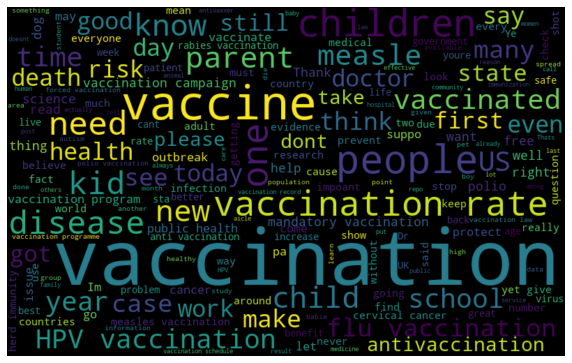

In [46]:
all_words = ' '.join([text for text in df['clean_tweets']])
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [14]:
import nltk
nltk.download("vader_lexicon")

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\chari\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [15]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

(array([ 182.,  334.,  350.,  388.,  394.,  393.,  580.,  348.,  252.,
         192., 2304.,  219.,  332.,  534.,  545.,  448.,  350.,  380.,
         327.,  145.]),
 array([-0.9806  , -0.882685, -0.78477 , -0.686855, -0.58894 , -0.491025,
        -0.39311 , -0.295195, -0.19728 , -0.099365, -0.00145 ,  0.096465,
         0.19438 ,  0.292295,  0.39021 ,  0.488125,  0.58604 ,  0.683955,
         0.78187 ,  0.879785,  0.9777  ]),
 <BarContainer object of 20 artists>)

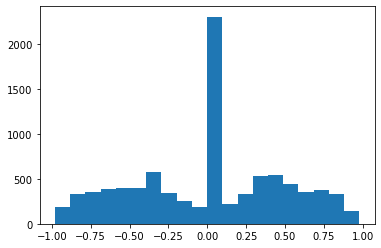

In [16]:
# create analyzer object 
analyzer = SentimentIntensityAnalyzer()

# get a list of scores and plot
scores = [analyzer.polarity_scores(tweet)['compound'] for tweet in df['clean_tweets']]
plt.hist(scores, bins=20)

In [17]:
sentiment = df['clean_tweets'].apply(lambda x: analyzer.polarity_scores(x))
df = pd.concat([df,sentiment.apply(pd.Series)],1)
df.head(5)

,date,tweet,hashtags,clean_tweets,neg,neu,pos,compound
62925,2019-07-22,"#STUDY: FLU #Vaccine Increases Viral #SHEDDING 6.3 Times http://www.pnas.org/content/early/2018/01/17/1716561115.full … ""We observed 6.3X more viral aerosol shedding among cases w/ vaccination ...","['#study', '#vaccine', '#shedding', '#learntherisk', '#flushot', '#vexit']",FLU Increases Viral Times … We observed 63X viral aerosol shedding among cases vaccination current previous season compared vaccination seasons pictwittercomui2FyiExU6,0.149,0.851,0.000,-0.5160
88953,2019-06-21,Interesting how you don’t understand Gardasil isn’t a vaccination that is given to babies. If you wanna sit at the grown up table at least stay on topic,[],Interesting ’ understand Gardasil ’ vaccination given babies If wan na sit grown table least stay topic,0.000,0.838,0.162,0.4019
15239,2019-09-18,How can maternal vaccination rates be increased? Investigators are looking for effective strategies to protect newborns against serious infections like #pertussis and #influenza. https://www.conta...,"['#pertussis', '#influenza']",How maternal vaccination rates increased Investigators looking effective strategies protect newborns serious infections like …,0.063,0.437,0.500,0.8402
78193,2019-07-02,No. Precisely NO. Adverse EVENTS are listed. These are anything & everything that has been recorded occurring after vaccination but have yet to be causally linked to it! This is NOT an indication ...,[],No Precisely NO Adverse EVENTS listed These anything everything recorded occurring vaccination yet causally linked This NOT indication may happen AKA side effects fever sore arm rash fussing etc,0.348,0.652,0.000,-0.8964
88242,2019-06-21,In fact even if this idiot did have a point in his xenophobic BS (he doesn’t BTW) it would actually make it even more important to ensure the UK population was protected via vaccination So this c...,[],In fact even idiot point xenophobic BS ’ BTW would actually make even impoant ensure UK population protected vaccination So comment one proof point stupid Leave voters,0.230,0.610,0.160,-0.3400


In [18]:
df.describe()

,neg,neu,pos,compound
count,8997.000000,8997.000000,8997.000000,8997.000000
mean,0.122300,0.749365,0.128219,0.002879
std,0.148511,0.185775,0.145689,0.475378
min,0.000000,0.000000,0.000000,-0.980600
25%,0.000000,0.614000,0.000000,-0.361200
50%,0.075000,0.749000,0.096000,0.000000
75%,0.214000,0.901000,0.216000,0.381800
max,1.000000,1.000000,1.000000,0.977700


In [63]:
!pip install textblob

neutral


In [71]:
from textblob import TextBlob
def get_tweet_sentiment(text):
        analysis = TextBlob(text)
        if analysis.sentiment.polarity > 0:
            return 'positive'
        elif analysis.sentiment.polarity == 0:
            return 'neutral'
        else:
            return 'negative'
print(get_tweet_sentiment("am feeling sick"))

negative


In [19]:
df.index = pd.to_datetime(df['date'])
df = df.sort_index()
df['mean'] = df['compound'].expanding().mean()
df['rolling'] = df['compound'].rolling('1d').mean()

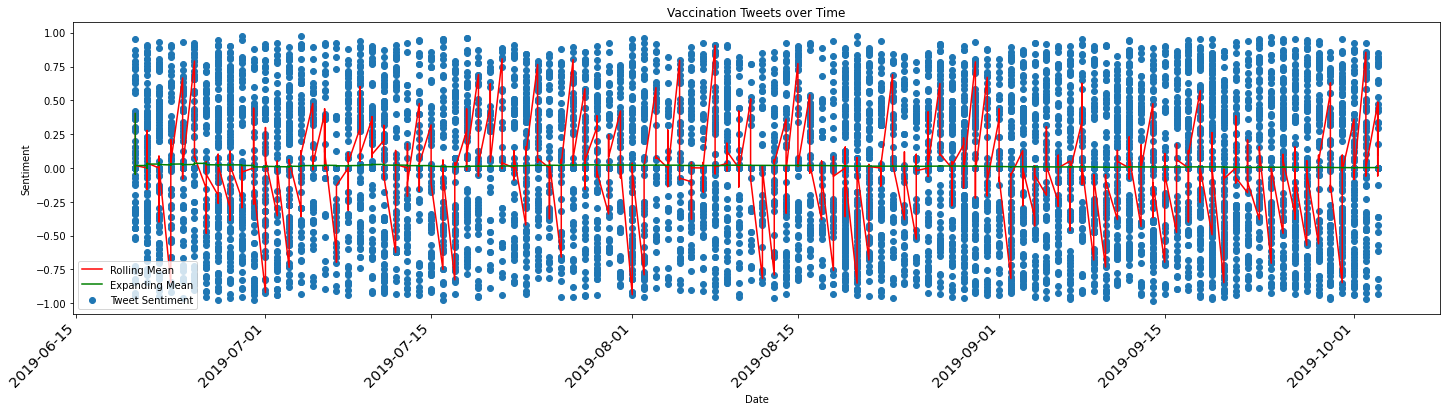

In [20]:
import datetime as dt

fig = plt.figure(figsize=(20,5))
ax = fig.add_subplot(111)
ax.scatter(df['date'],df['compound'], label='Tweet Sentiment')
ax.plot(df['date'],df['rolling'], color ='r', label='Rolling Mean')
ax.plot(df['date'],df['mean'], color='g', label='Expanding Mean')
#ax.set_xlim([dt.date(2019,6,15),dt.date(2019,10,15)])
ax.set(title='Vaccination Tweets over Time', xlabel='Date', ylabel='Sentiment')
ax.legend(loc='best')
fig.tight_layout()
plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='x-large'  
)
plt.show()

C:\Users\chari\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


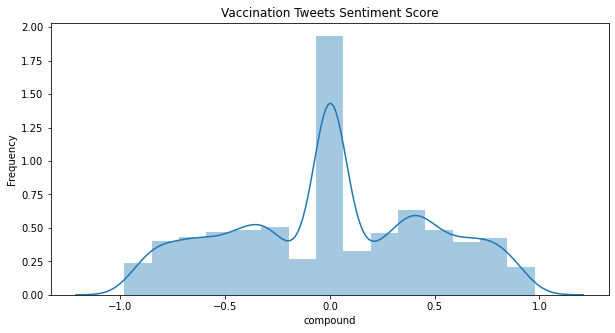

In [21]:
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(111)
ax.set(title='Vaccination Tweets Sentiment Score', xlabel='Compund Sentiment Score', ylabel='Frequency')
sns.distplot(df['compound'], bins=15, ax=ax)
plt.show()

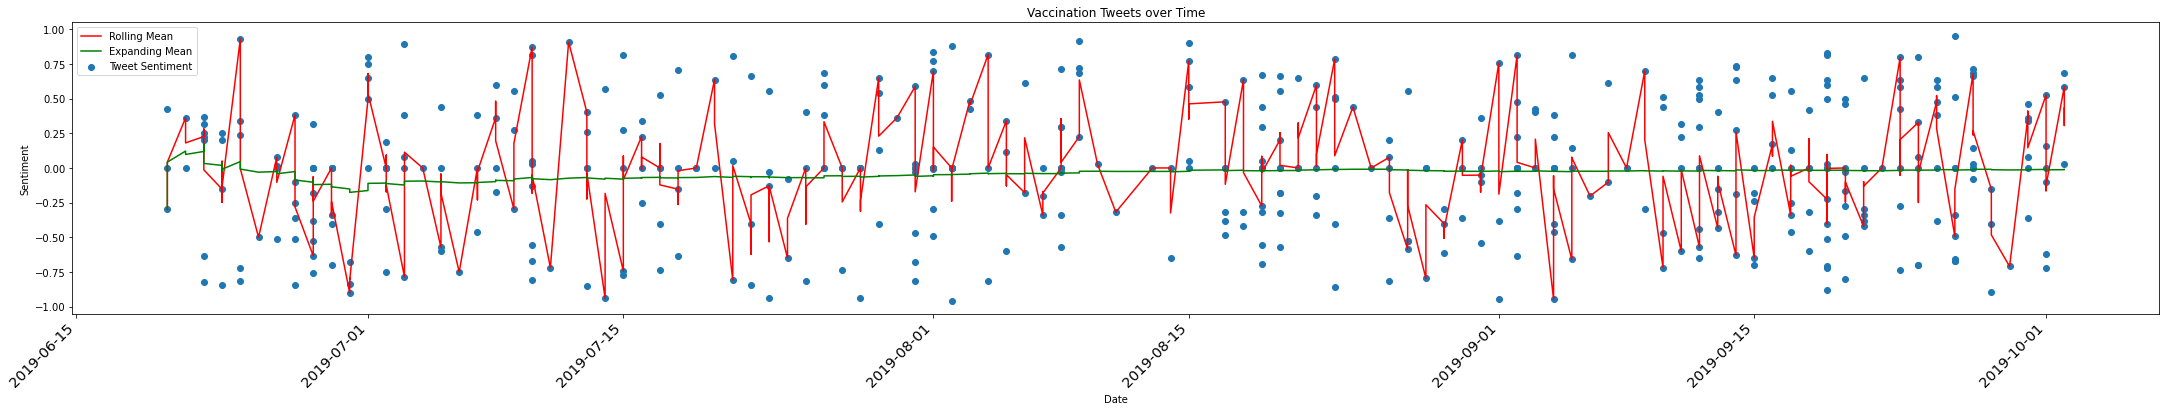

In [22]:
ot = df.sample(frac=.05, random_state=1111)
ot.sort_index(inplace=True)

ot['mean'] = ot['compound'].expanding().mean()
ot['rolling'] = ot['compound'].rolling('1d').mean()

fig = plt.figure(figsize=(30,5))
ax = fig.add_subplot(111)
ax.scatter(ot['date'],ot['compound'], label='Tweet Sentiment')
ax.plot(ot['date'],ot['rolling'], color ='r', label='Rolling Mean')
ax.plot(ot['date'],ot['mean'], color='g', label='Expanding Mean')
ax.set(title='Vaccination Tweets over Time', xlabel='Date', ylabel='Sentiment')
ax.legend(loc='best')
fig.tight_layout()
plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='x-large'  
)
plt.show()